# BDAT 1004 | Problem Set 2

<h3><font color='#5E5E5E'>Question 1</font></h3>

In [122]:
#1
import pandas as pd
import numpy as np

In [123]:
#2,3

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [124]:
#4
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [125]:
#5
users['is_male'] = users.gender.apply(lambda x: True if x == 'M' else False)
users.is_male

0       True
1      False
2       True
3       True
4      False
       ...  
938    False
939     True
940     True
941    False
942     True
Name: is_male, Length: 943, dtype: bool

In [126]:
(users.groupby('occupation').is_male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [127]:
#6
print(users.groupby('occupation').age.min())
print(users.groupby('occupation').age.max())

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64
occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


In [128]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [129]:
#7
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [130]:
#8

gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occup_count = users.groupby(['occupation']).count()

occup_gender = gender_ocup.div(occup_count, level = "occupation")
occup_gender.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

<h3><font color='#5E5E5E'>Question 2</font></h3>

In [131]:
import numpy as np
import pandas as pd
import statistics as st

In [132]:
## 1,2,3

euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [133]:
## 4

Goals = euro12['Goals']
Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [134]:
## 5

len(euro12['Team'].unique())

16

In [135]:
## 6

cols = len(euro12.axes[1])
cols


35

In [136]:
## 7

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [137]:
## 8

discipline.sort_values(['Red Cards', 'Yellow Cards'], inplace = True)
discipline

C:\Users\Admin\AppData\Local\Temp\ipykernel_1960\2204955026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discipline.sort_values(['Red Cards', 'Yellow Cards'], inplace = True)


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [138]:
## 8

discipline['Yellow Cards'].mean()

7.4375

In [141]:
## 10

euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [143]:
## 11

euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [144]:
## 12

euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [145]:
## 13

euro12.iloc[:, :-3]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [146]:
## 14

euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


<h3><font color='#5E5E5E'>Question 3</font></h3>

In [147]:
import numpy as np
import pandas as pd

In [148]:
## 2

s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)

0     4
1     2
2     2
3     2
4     4
     ..
95    2
96    2
97    3
98    3
99    2
Length: 100, dtype: int32 0     2
1     3
2     2
3     3
4     3
     ..
95    2
96    1
97    1
98    1
99    1
Length: 100, dtype: int32 0     27368
1     14749
2     22394
3     11414
4     17966
      ...  
95    11974
96    22779
97    24535
98    18776
99    21561
Length: 100, dtype: int32


In [149]:
## 3

df = pd.concat([s1, s2, s3], axis=1)
df.head()

,0,1,2
0,4,2,27368
1,2,3,14749
2,2,2,22394
3,2,3,11414
4,4,3,17966


In [150]:
## 4

df.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
df.head()

,bedrs,bathrs,price_sqr_meter
0,4,2,27368
1,2,3,14749
2,2,2,22394
3,2,3,11414
4,4,3,17966


In [151]:
## 5


bigcolumn = pd.concat([s1, s2, s3], axis=0)


bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn


<class 'pandas.core.frame.DataFrame'>


,0
0,4
1,2
2,2
3,2
4,4
...,...
95,11974
96,22779
97,24535
98,18776


In [152]:
## 6

len(bigcolumn)

300

In [153]:
## 7

bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,4
1,2
2,2
3,2
4,4
...,...
295,11974
296,22779
297,24535
298,18776


<h3><font color='#5E5E5E'>Question 4</font></h3>

In [154]:
import pandas as pd
import numpy as np
import datetime as dt

In [155]:
## 2,3

data = pd.read_csv(r"C:\Users\Admin\Desktop\Last problem set\wind.txt",sep = '\s+',parse_dates={'Date' : ['Yr','Mo','Dy']})
data

data.dtypes

data['Date']

0      2061-01-01
1      2061-01-02
2      2061-01-03
3      2061-01-04
4      2061-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Date, Length: 6574, dtype: datetime64[ns]

In [156]:
## 4

data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))

In [157]:
## 5


Data2 = data.set_index("Date")
Data2.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [158]:
##6
print(Data2.isnull().values.ravel().sum())

31


In [159]:
## 7

x=Data2.count()
print("Total Non-missing values are :",x.sum())

Total Non-missing values are : 78857


In [160]:
## 8

y = Data2.mean()
y.mean()

10.227982360836924

In [161]:
## 9
def stats(x):
    x = pd.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = Data2.apply(stats)
loc_stats



,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [162]:
## 10
day_stats = Data2.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [163]:
## 11

jan = Data2[Data2.index.month == 1]
print ("January windspeeds:")
print (jan.mean())



January windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [164]:
## 12

print( "Yearly:\n", Data2.resample('A').mean())



Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

In [165]:
## 13

print ("Monthly:", Data2.resample('M').mean())



Monthly:                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161

In [166]:
## 14

print ("Weekly:", Data2.resample('W').mean())



Weekly:                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429

In [167]:
## 15
new = Data2.groupby(lambda d: (d.month, d.year))
print ("Mean wind")
print (new.mean())

fy = Data2[Data2.index.year == 1961]
final = Data2.resample('W').mean().apply(lambda x: x.describe())
print (final)

Mean wind
                  RPT        VAL        ROS       KIL        SHA        BIR  \
(1, 1961)   14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
(1, 1962)   14.783871  13.160323  12.591935  7.538065  11.779677   8.720000   
(1, 1963)   14.868387  11.112903  15.121613  6.635806  11.080645   7.835484   
(1, 1964)   12.661290  11.818387  11.741290  6.953548  11.400645   6.865806   
(1, 1965)   15.741613  15.546774  15.274194  8.258387  13.588065   9.251290   
...               ...        ...        ...       ...        ...        ...   
(12, 1974)  18.511290  17.805806  14.773871  9.734839  16.944194  10.153871   
(12, 1975)  11.655484   8.686774  11.217742  4.478387   6.628710   4.178065   
(12, 1976)  11.962258  10.086774  10.474516  3.383871   7.645484   6.148387   
(12, 1977)  14.751935  12.744839  13.469677  6.592258  11.247742   9.466774   
(12, 1978)  16.175484  13.748065  15.635161  7.094839  11.398710   9.241613   

                  DUB        CLA        M

<h3><font color='#5E5E5E'>Question 5</font></h3>

In [168]:
import pandas as pd
import numpy as np

In [169]:
## 2,3

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [170]:
## 4

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [171]:
## 5
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [172]:
## 6

cols = chipo.columns
print(len(cols))

5


In [173]:
## 7

for name in cols:
    print(name)

order_id
quantity
item_name
choice_description
item_price


In [174]:
## 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [175]:
## 9
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).index[0]

chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [176]:
## 10

chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).values[0]

chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)


,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [177]:
## 11

chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [178]:
## Step 12: How many items were orderd in total?

chipo.quantity.sum()

4972

In [179]:
## 13

chipo.dtypes.item_price

chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

chipo.item_price.dtypes

dtype('float64')

In [180]:
## 14

chipo['revenue'] = chipo['quantity']*chipo.item_price
total_revenue = chipo.revenue.sum()
total_revenue

39237.02

In [181]:
## 15
total_order = chipo.order_id.nunique()
total_order

1834

In [182]:
## 16

order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']



21.394231188658654

In [183]:
## 17

chipo.item_name.nunique()

50

<h3><font color='#5E5E5E'>Question 6</font></h3>

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
us_marriage_divorce_data = pd.read_csv(r'C:\Users\Admin\Desktop\Last problem set\us-marriages-divorces-1867-2014.csv')

us_marriage_divorce_data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [186]:
years = us_marriage_divorce_data['Year'].values

yearlist = years.tolist()

Text(0, 0.5, 'Year')

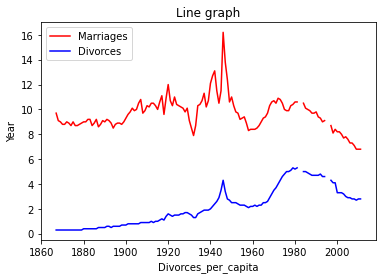

In [187]:
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values

marriagelist = marriages_per_capita.tolist()
divorcelist = divorces_per_capita.tolist()

plt.plot(yearlist , marriagelist, color = "Red", label="Marriages")
plt.plot(yearlist, divorcelist, color = "Blue", label="Divorces")
plt.legend(loc="upper left")
plt.title("Line graph")
plt.xlabel("Divorces_per_capita")
plt.ylabel("Year")

<h3><font color='#5E5E5E'>Question 7</font></h3>

In [188]:
marr_dir_data = pd.read_csv(r'C:\Users\Admin\Desktop\Last problem set\us-marriages-divorces-1867-2014.csv')
marr_dir_data = marr_dir_data[
    marr_dir_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

marr_dir_data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


In [189]:
df1900 = marr_dir_data[marr_dir_data.Year == 1900]
df1950 = marr_dir_data[marr_dir_data.Year == 1950]
df2000 = marr_dir_data[marr_dir_data.Year == 2000]


In [190]:
combine = [df1900,df1950,df2000]

gra = pd.concat(combine)
gra

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


<AxesSubplot:xlabel='Year'>

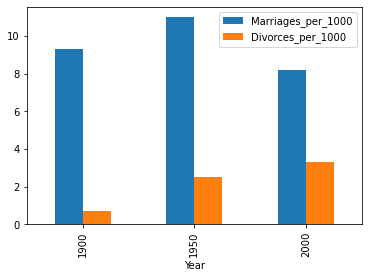

In [191]:
gra.plot(x = 'Year', y = ['Marriages_per_1000','Divorces_per_1000'], kind = 'bar')

<h3><font color='#5E5E5E'>Question 8</font></h3>

In [192]:
hollywood_actor_kills = pd.read_csv(r'C:\Users\Admin\Desktop\Last problem set\actor_kill_counts.csv')
hollywood_actor_kills

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [193]:
actor_names = hollywood_actor_kills['Actor'].values

actornameslist = actor_names.tolist()

Text(0.5, 1.0, 'Horizontal Bar Graph')

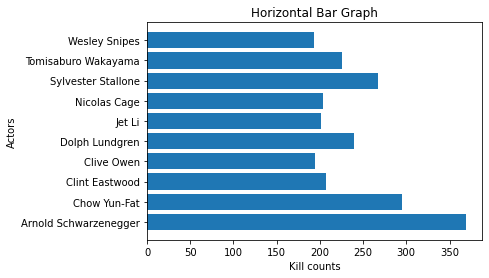

In [194]:
kill_counts = hollywood_actor_kills['Count'].values

killcountslist = kill_counts.tolist()

plt.barh(actornameslist, killcountslist)
 
plt.ylabel("Actors")
plt.xlabel("Kill counts")
plt.title("Horizontal Bar Graph")

<h3><font color='#5E5E5E'>Question 9</font></h3>

In [195]:
romanemp = pd.read_csv(r'C:\Users\Admin\Desktop\Last problem set\roman-emperor-reigns.csv')

romanemp

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


<AxesSubplot:ylabel='Length_of_Reign'>

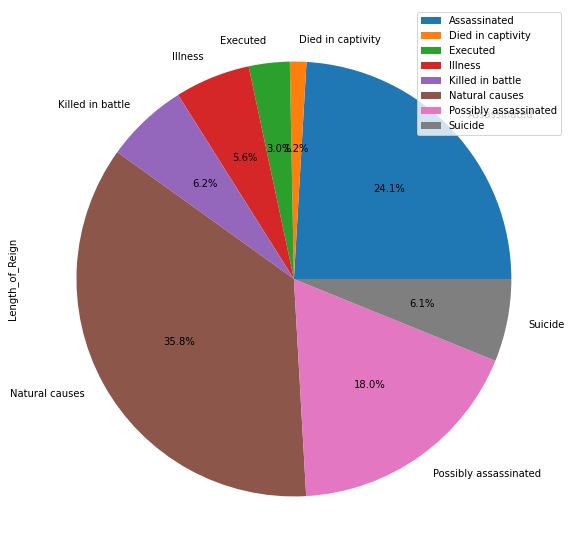

In [196]:
romanemp.groupby(['Cause_of_Death']).sum().plot(kind='pie', y='Length_of_Reign', figsize = (15,10),autopct='%1.1f%%')

<h3><font color='#5E5E5E'>Question 10</font></h3>

In [197]:
import seaborn as sns

data = pd.read_csv(r'C:\Users\Admin\Desktop\Last problem set\arcade-revenue-vs-cs-doctorates.csv')

data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

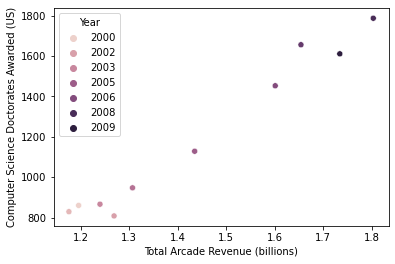

In [198]:
sns.scatterplot(x = 'Total Arcade Revenue (billions)', y = 'Computer Science Doctorates Awarded (US)', hue = 'Year', data = data)